# Exploratory Data Analysis

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import data
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#As we can see Totalcharges is actually numerical feature but it is showing as object
#Now covert it into numberic
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# make all column names lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [7]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [9]:
#Finding missing values
df.isna().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [11]:
#Totalcharge has 11 missing values, hence we will calculate total charge by multiplying monthly charges and tenure
df.totalcharges = df.totalcharges.fillna(df.tenure.multiply(df.monthlycharges))
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

# Churn Outcome Distributions

Total of 27% of customers are churned


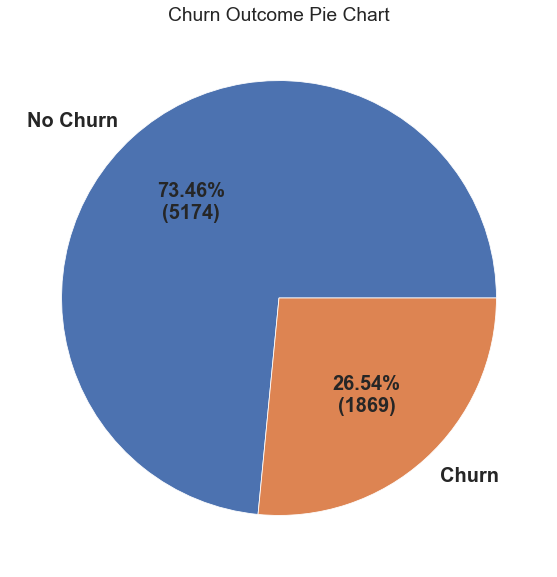

In [21]:
def plot_churn_distribution(df):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (10, 10))
    plt.title('Churn Outcome Pie Chart')
    plt.pie(df.churn.value_counts(),labels = ['No Churn', 'Churn'], autopct = data_format(df.churn.count()), radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    

def data_format(total):
    def my_autopct(pct):
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct


plot_churn_distribution(df)
print("Total of 27% of customers are churned")

## Conclusion on Churn Outcome Distributions 
### - Total of 7043 customers, 26.5% 1869 customers are churned

# Gender Feature Analysis

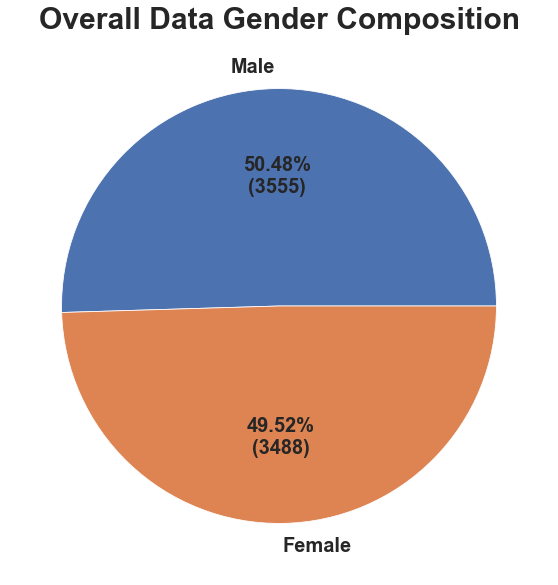

In [27]:
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 2)
fig = plt.figure(figsize = (30,10))

plt.pie(df.gender.value_counts(), labels = ['Male', 'Female'], autopct = data_format(df.gender.count()), radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'});
plt.title('Overall Data Gender Composition', fontweight = 'bold', fontsize = 30);


Male - No Churn      2625
Female - No Churn    2549
Female - Churn        939
Male - Churn          930
Name: gender_churn_group, dtype: int64


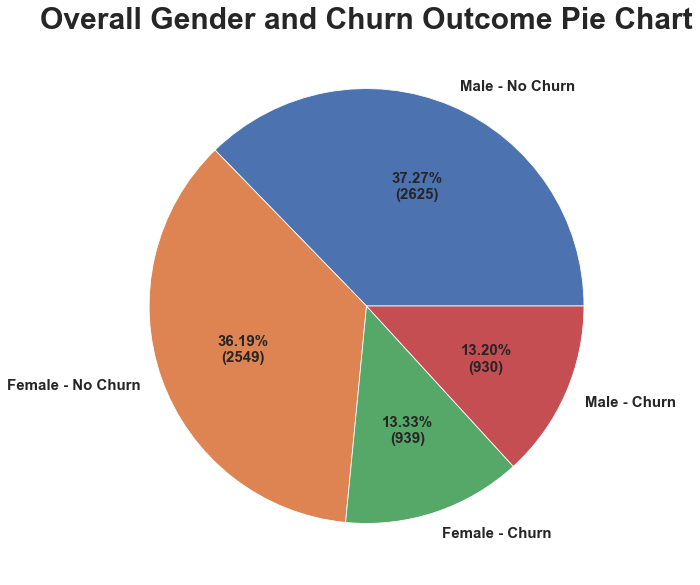

In [33]:
def gender_churn_group(df):
    if (df.gender == 'Male' and df.churn == 'No'):
        return "Male - No Churn"
    elif (df.gender == 'Male' and df.churn == 'Yes'):
        return "Male - Churn"
    elif (df.gender == 'Female' and df.churn == 'No'):
        return "Female - No Churn"
    elif (df.gender == 'Female' and df.churn == 'Yes'):
        return "Female - Churn"

    

df['gender_churn_group'] = df.apply(lambda df: gender_churn_group(df), axis = 1)
print(df['gender_churn_group'].value_counts())
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 2)
fig = plt.figure(figsize = (30,10))
plt.title('Overall Gender and Churn Outcome Pie Chart',fontweight = 'bold', fontsize = 30)
plt.pie(df.gender_churn_group.value_counts(),labels = ['Male - No Churn', 'Female - No Churn', 'Female - Churn', 'Male - Churn'], autopct = data_format(df.gender_churn_group.count()), radius = 1, textprops={'fontsize': 15, 'fontweight': 'bold'});


## Conclusion: 
- Looking at the above two graphs, Gender feature is almost equally distributed over the target feature. Hence this feature is not the influencer for churn

# Age Feature Analysis        

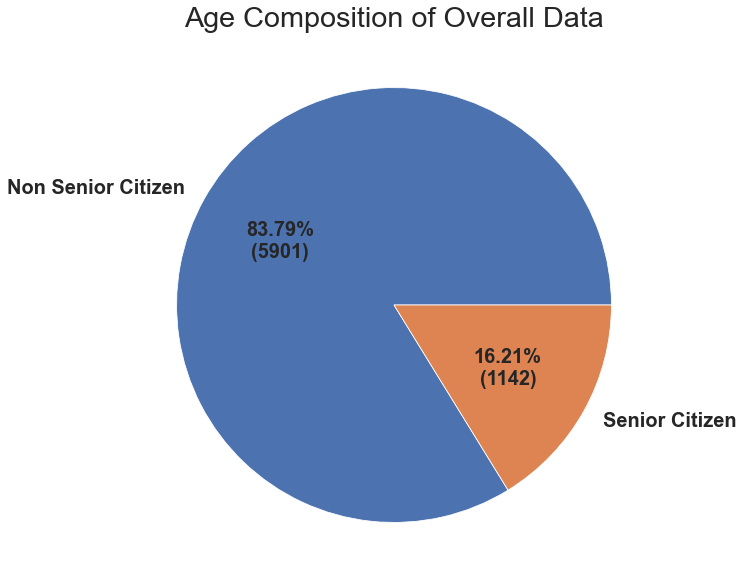

In [42]:
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 3)

fig = plt.figure(figsize = (10, 10))
plt.title('Age Composition of Overall Data')
plt.pie(df.seniorcitizen.value_counts(),labels = ['Non Senior Citizen', 'Senior Citizen'], autopct = data_format(df.seniorcitizen.count()), radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'});


In [46]:
df.churn[(df.seniorcitizen == 1)].value_counts()

No     666
Yes    476
Name: churn, dtype: int64

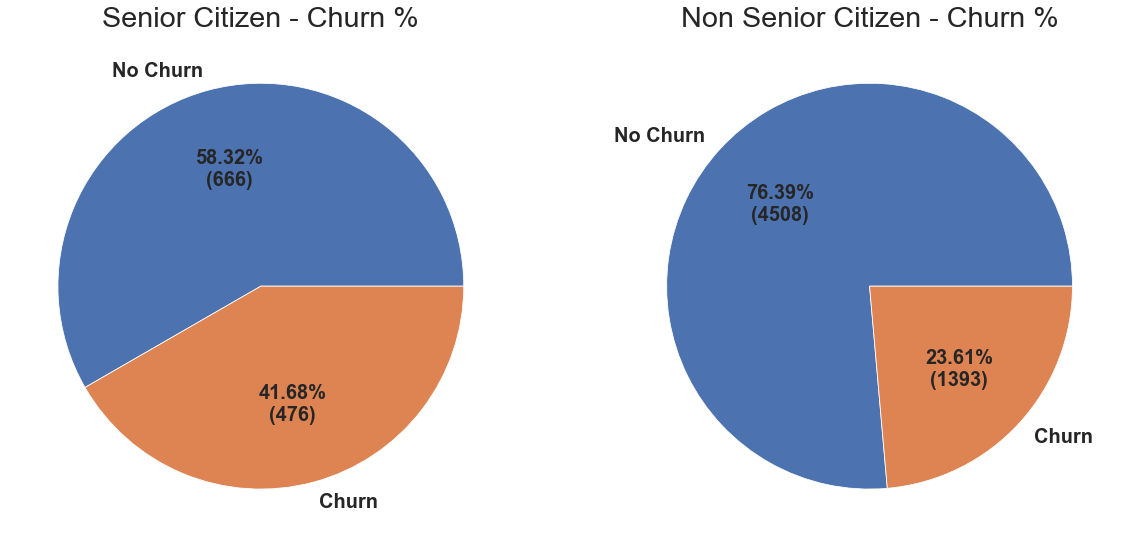

In [48]:
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 3)

fig = plt.figure(figsize = (20, 20))
plt.subplot(121)
plt.title('Senior Citizen - Churn %')
plt.pie(df.churn[(df.seniorcitizen == 1)].value_counts(),labels = ['No Churn', 'Churn'], autopct = data_format(df.churn[(df.seniorcitizen == 1)].count()), radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'});
plt.subplot(122)
plt.title('Non Senior Citizen - Churn %')
plt.pie(df.churn[(df.seniorcitizen == 0)].value_counts(),labels = ['No Churn', 'Churn'], autopct = data_format(df.churn[(df.seniorcitizen == 0)].count()), radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'});


## Conclusion: 
- First graph indicates overall only around 16% of customers are Seniors
- Second graph indicates Churn count is more in non Senior Citizen customers however churn ratio of Senior Citizens are highter then non Senior Citizen

# Partner feature analysis 

C:\Users\i331215\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Percentage of Total')

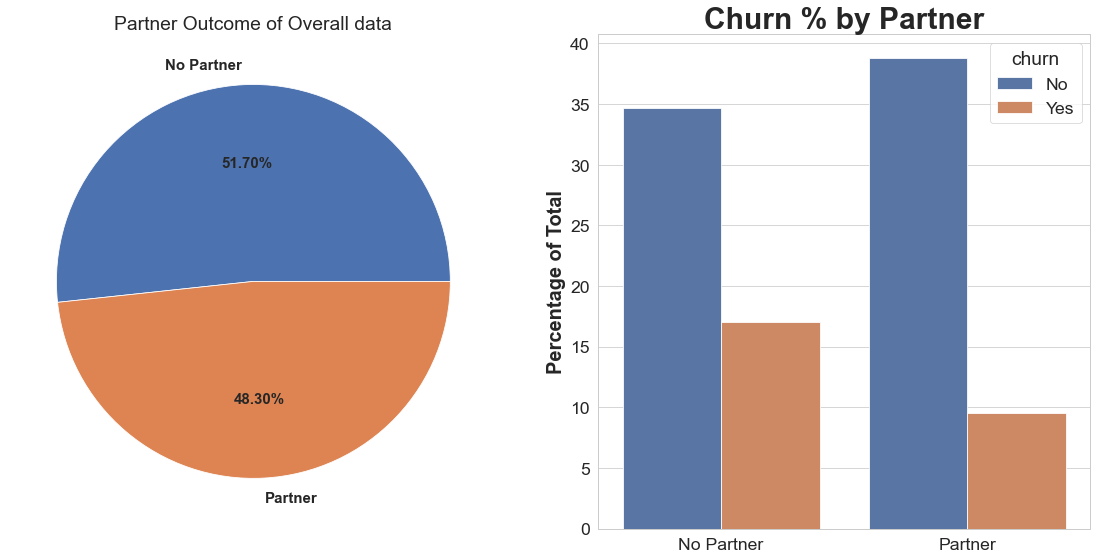

In [50]:
#Partner
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 2)
fig = plt.figure(figsize = (30, 20))
plt.subplot(231)
plt.title('Partner Outcome of Overall data')
plt.pie(df.partner.value_counts(),labels = ['No Partner', 'Partner'], autopct = '%.2f%%', radius = 1, textprops={'fontsize': 15, 'fontweight': 'bold'});
plt.subplot(232)
x = df.copy()
x = x.groupby('partner')['churn'].value_counts().to_frame()
x = x.rename({'churn':'pct_total'}, axis = 1).reset_index()
x['pct_total'] = (x['pct_total']/len(df)) * 100
u = sns.barplot('partner', y = 'pct_total', hue = 'churn', data = x);
u.set_title('Churn % by Partner', fontweight = 'bold', fontsize = 30)
u.set(xticklabels = ['No Partner', 'Partner'])
u.set_xlabel('')
u.set_ylabel('Percentage of Total', fontweight = 'bold', fontsize = 20)

##  Conclusion: 
- Overall, those without partners are more likely to churn than those with partners

# Dependents feature analysis

C:\Users\i331215\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


No     4933
Yes    2110
Name: dependents, dtype: int64

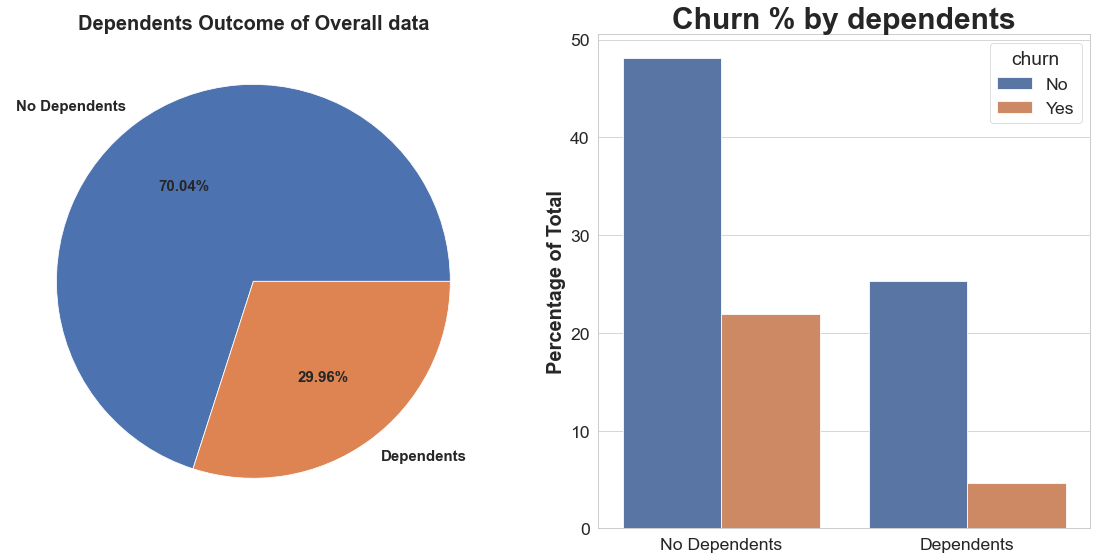

In [53]:
#dependents
sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 2)
fig = plt.figure(figsize = (30, 20))
plt.subplot(231)
plt.title('Dependents Outcome of Overall data', fontweight = 'bold', fontsize = 20)
plt.pie(df.dependents.value_counts(),labels = ['No Dependents', 'Dependents'], autopct = '%.2f%%', radius = 1, textprops={'fontsize': 15, 'fontweight': 'bold'});
plt.subplot(232)
x = df.copy()
x = x.groupby('dependents')['churn'].value_counts().to_frame()
x = x.rename({'churn':'pct_total'}, axis = 1).reset_index()
x['pct_total'] = (x['pct_total']/len(df)) * 100
u = sns.barplot('dependents', y = 'pct_total', hue = 'churn', data = x);
u.set_title('Churn % by dependents', fontweight = 'bold', fontsize = 30)
u.set(xticklabels = ['No Dependents', 'Dependents'])
u.set_xlabel('')
u.set_ylabel('Percentage of Total', fontweight = 'bold', fontsize = 20)
df.dependents.value_counts()

##  Conclusion: 
- Customers without dependents are more likely to churn than those with dependents

# Tenure feature analysis

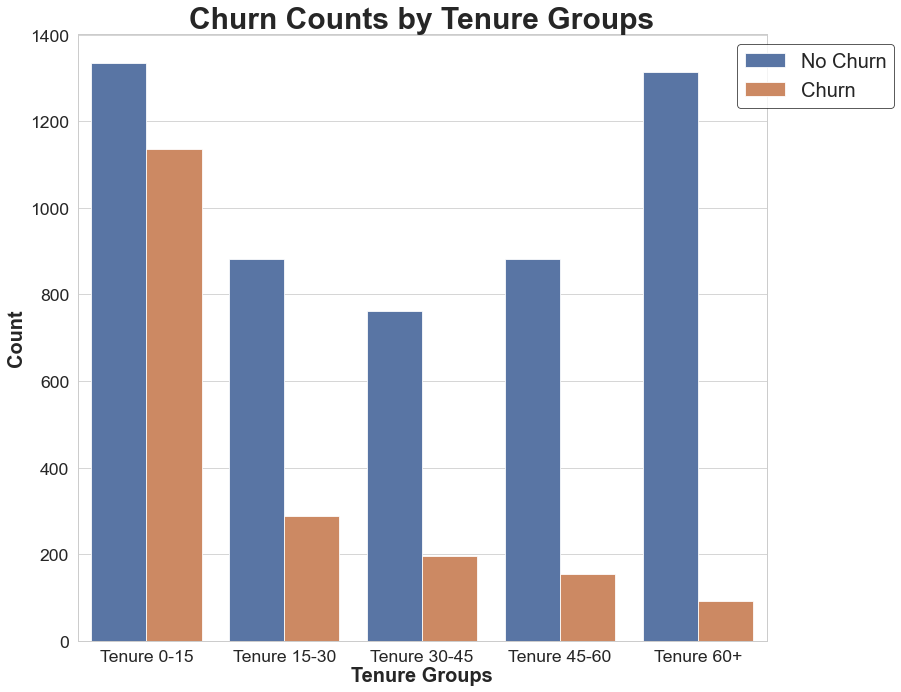

In [55]:
def tenure_groups(df) :
    
    if df["tenure"] <= 15 :
        return "Tenure 0-15"
    elif (df["tenure"] > 15) & (df["tenure"] <= 30 ):
        return "Tenure 15-30"
    elif (df["tenure"] > 30) & (df["tenure"] <= 45) :
        return "Tenure 30-45"
    elif (df["tenure"] > 45) & (df["tenure"] <= 60) :
        return "Tenure 45-60"
    elif df["tenure"] > 60 :
        return "Tenure 60+"
    

def tenure_group_counts(df):
    plt.figure(figsize = (13,10))
    t = sns.countplot(data = df, x = 'grouped_tenure', hue = 'churn', order = ['Tenure 0-15', 'Tenure 15-30', 'Tenure 30-45', 'Tenure 45-60', 'Tenure 60+'])
    t.set_title('Churn Counts by Tenure Groups', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()
    
df['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)
tenure_group_counts(df)

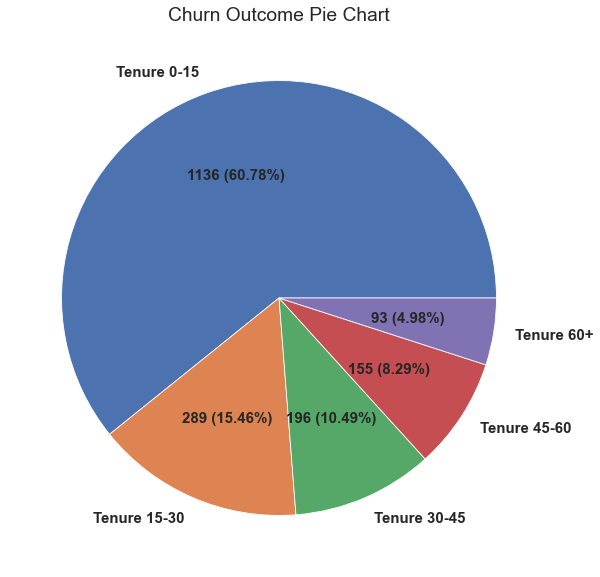

In [56]:

def tenure_format(x):
    return '{:.0f} ({:.2f}%)'.format(df.grouped_tenure[df.churn == 'Yes'].count()*x/100, x)


sns.set(style = 'whitegrid')
sns.set_context('paper', font_scale = 2)
fig = plt.figure(figsize = (20, 10))
plt.title('Churn Outcome Pie Chart')
plt.pie(df.grouped_tenure[df.churn == 'Yes'].value_counts(),labels = ['Tenure 0-15', 'Tenure 15-30', 'Tenure 30-45', 'Tenure 45-60', 'Tenure 60+'], autopct = tenure_format, radius = 1, textprops={'fontsize': 15, 'fontweight': 'bold'});


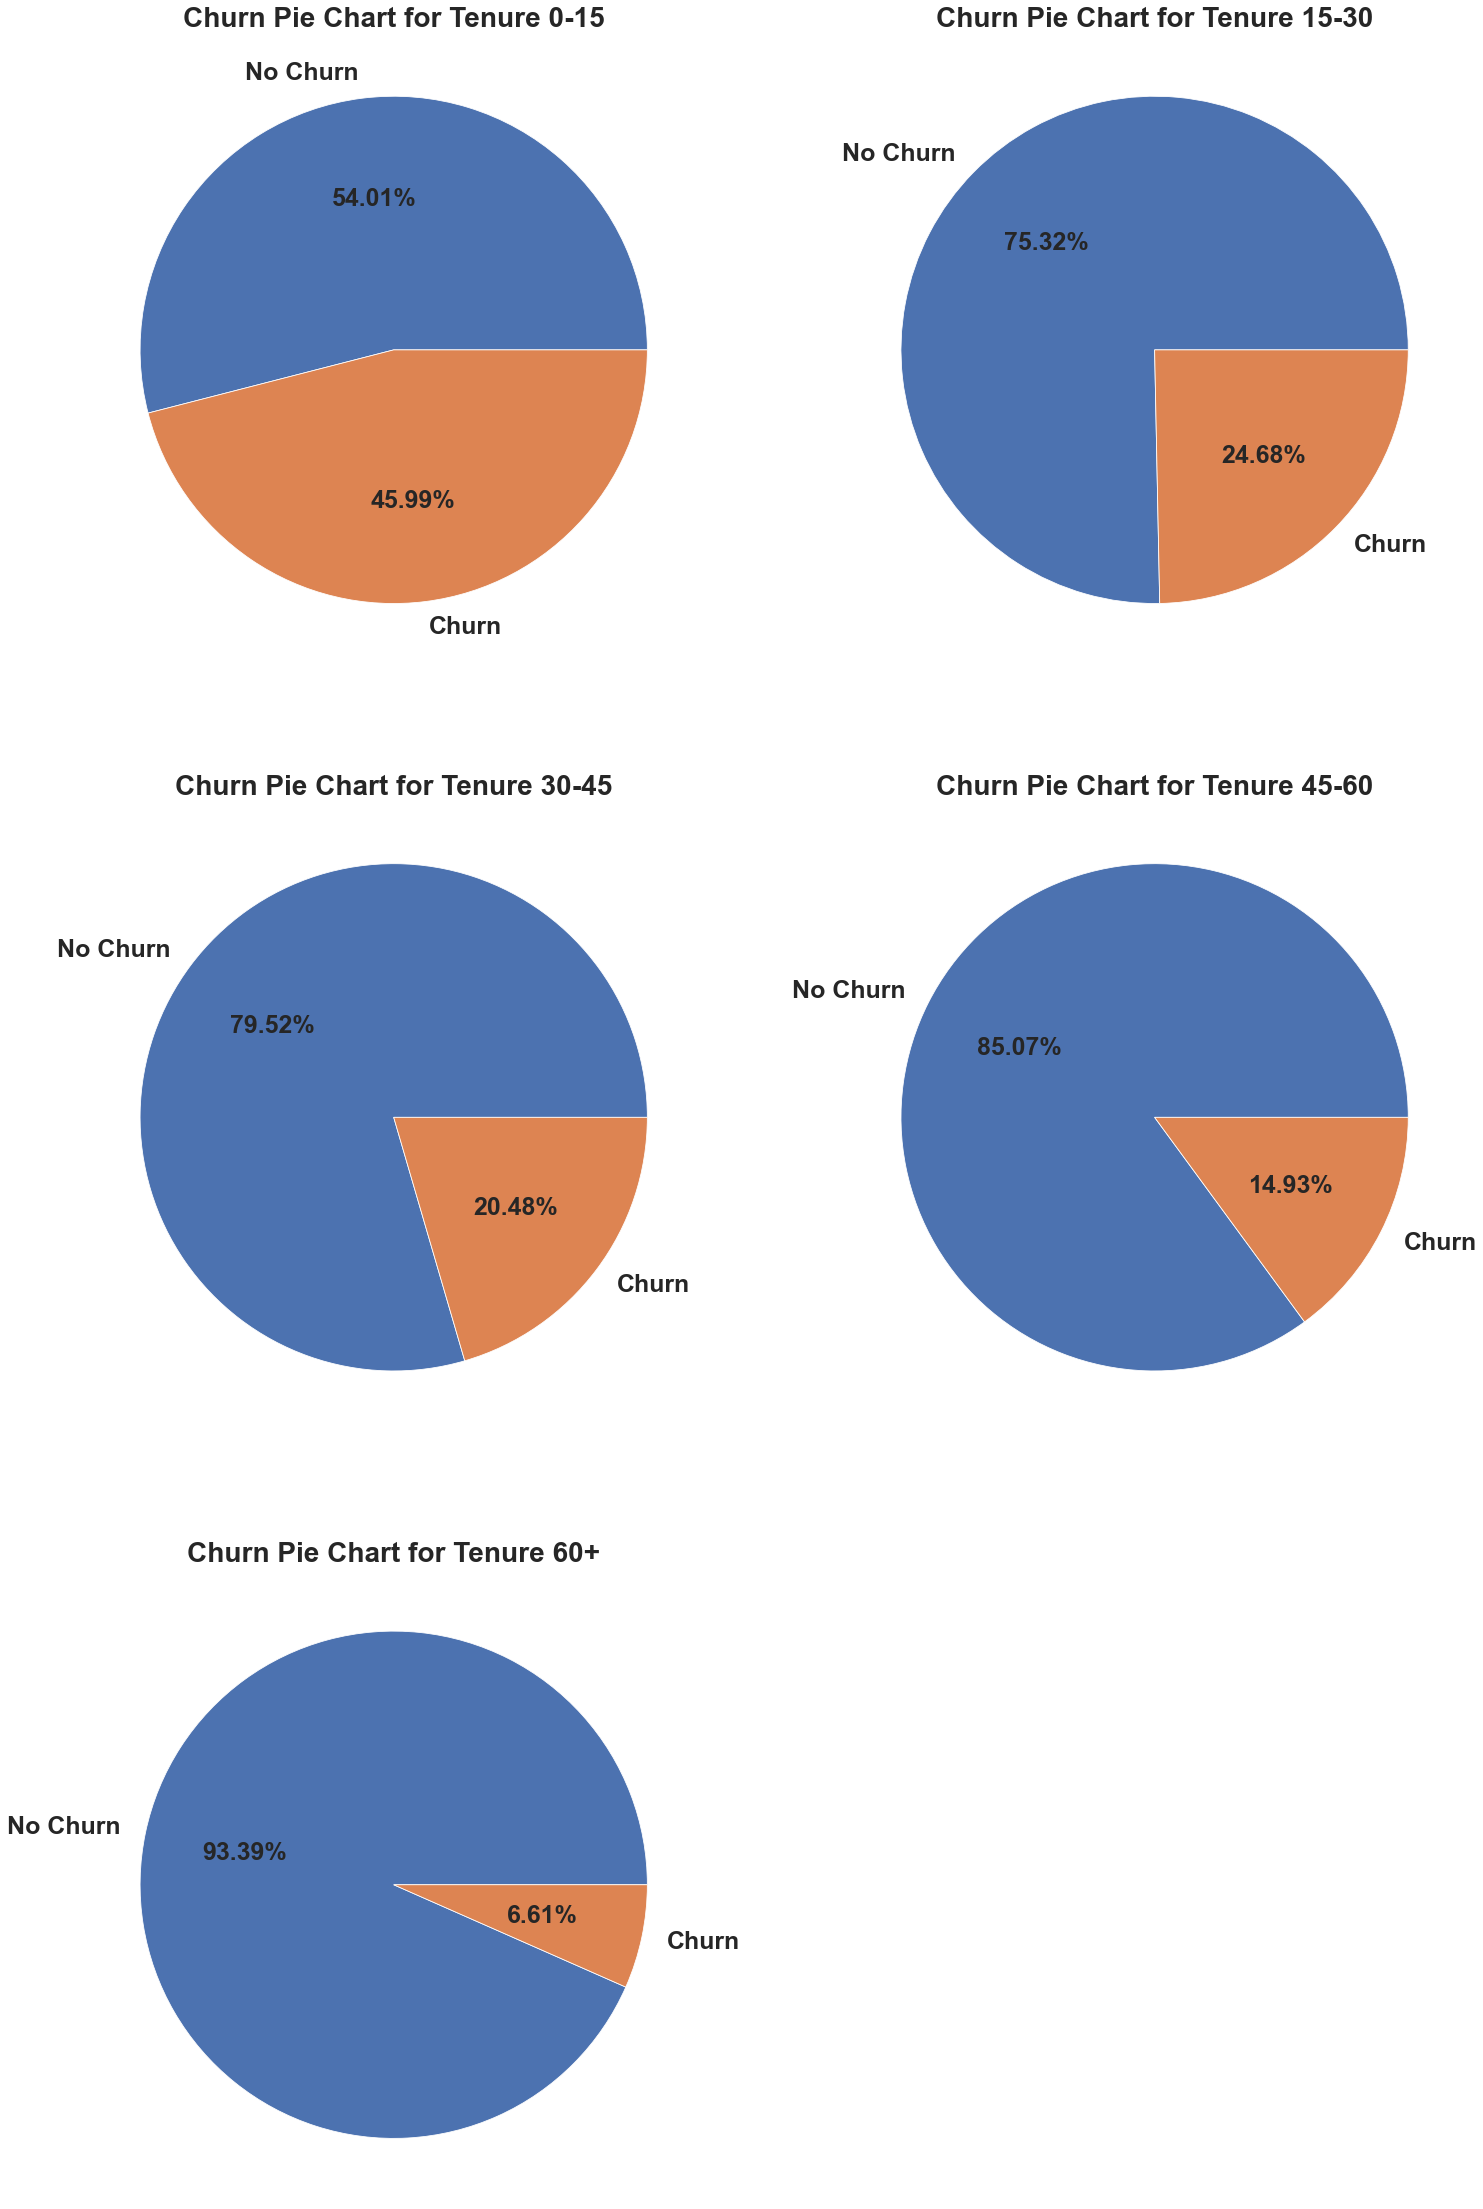

In [60]:
tenuregroup_list = ['Tenure 0-15', 'Tenure 15-30', 'Tenure 30-45', 'Tenure 45-60', 'Tenure 60+']
subplot_count = 321
fig = plt.figure(figsize = (25, 40))

for eachTenure in tenuregroup_list:
    plt.subplot(subplot_count)
    plt.title('Churn Pie Chart for '+ eachTenure, fontsize = 28, fontweight = 'bold')
    plt.pie(df[df.grouped_tenure == eachTenure].churn.value_counts(),labels = ['No Churn', 'Churn'],  autopct = '%.2f%%', radius = 1, textprops={'fontsize': 25, 'fontweight': 'bold'});
    subplot_count = subplot_count + 1

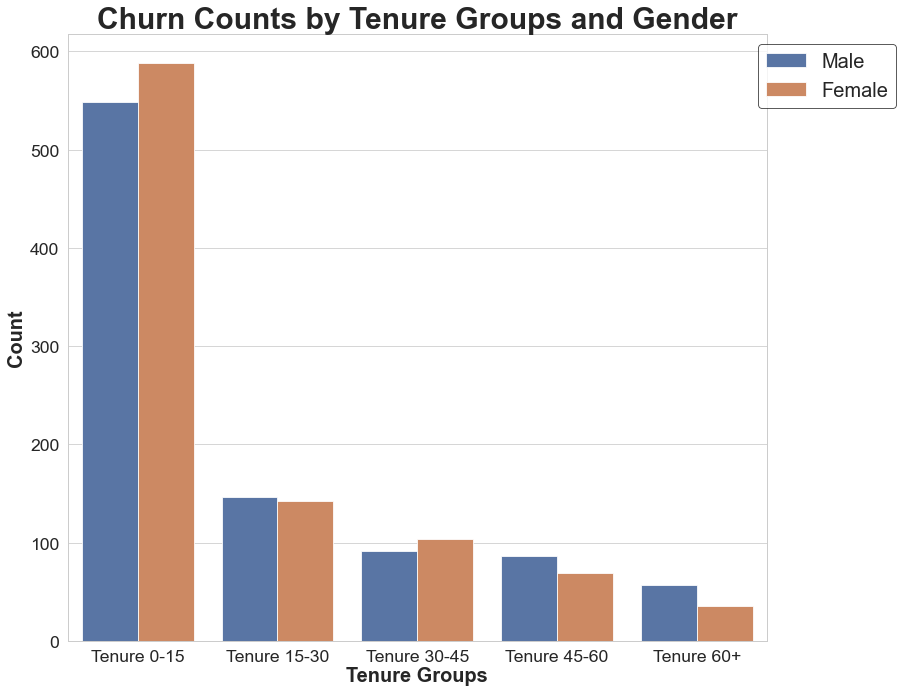

In [57]:
def tenure_group_gender_counts(df):
    plt.figure(figsize = (13,10))
    t = sns.countplot(data = df, x = 'grouped_tenure', hue = 'gender', order = ['Tenure 0-15', 'Tenure 15-30', 'Tenure 30-45', 'Tenure 45-60', 'Tenure 60+'])
    t.set_title('Churn Counts by Tenure Groups and Gender', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['Male', 'Female'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()
    
tenure_group_gender_counts(df[df.churn == 'Yes'])

##  Conclusion: 
- Customers with lesser tenure have higher chances of churning.
- Higher number of female customer churned between 0-15 tenure and 30-50 tenure.

# Contract feature analysis 

Text(0.5, 1.0, 'Customer Contract on overall data')

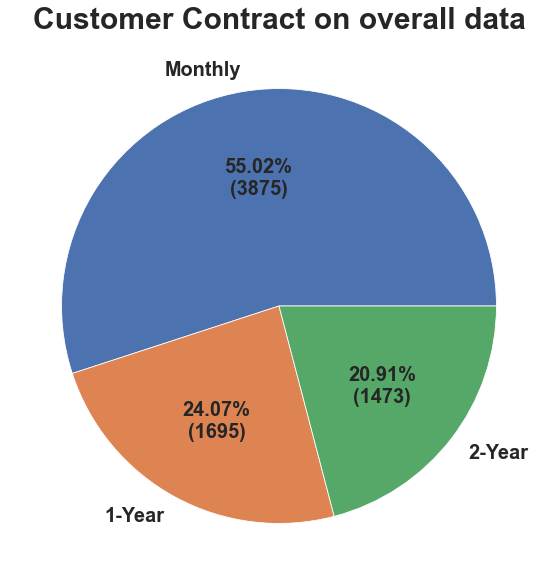

In [80]:
fig = plt.figure(figsize = (10, 10))
plt.pie(df.contract.value_counts(), labels = ['Monthly', '1-Year', '2-Year'], radius=1, autopct = data_format(df.contract.count()), textprops = {'fontweight':'bold', 'fontsize': 20})
plt.title('Customer Contract on overall data', fontweight = 'bold', fontsize = 30)

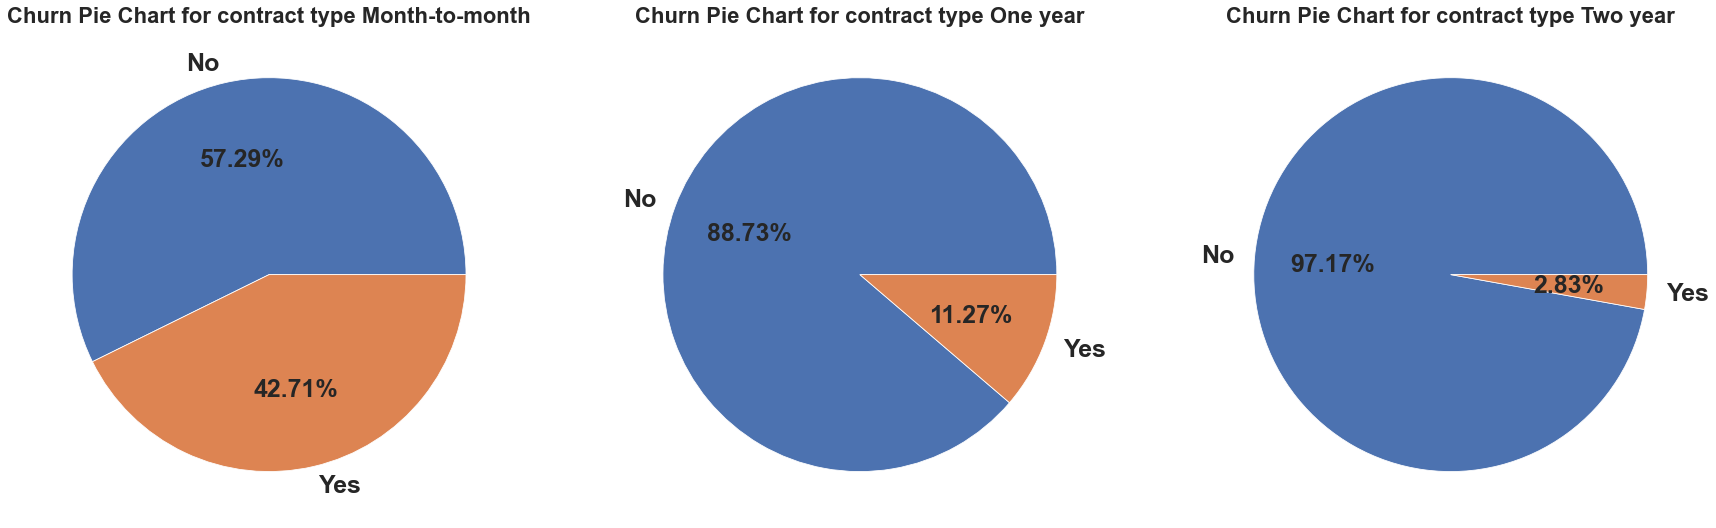

In [69]:
contract_list = ['Month-to-month', 'One year', 'Two year']

subplot_count = 131
fig = plt.figure(figsize = (30, 20))

for eachcontract in contract_list:
    plt.subplot(subplot_count)
    plt.title('Churn Pie Chart for contract type '+ eachcontract, fontsize = 22, fontweight = 'bold')
    plt.pie(df[df.contract == eachcontract].churn.value_counts(),labels = ['No', 'Yes'],  autopct = '%.2f%%', radius = 1, textprops={'fontsize': 25, 'fontweight': 'bold'});
    subplot_count = subplot_count + 1

##  Conclusion: 
- More than 50% of customers are opted for montly contract
- Customer having Monthly contract type are more likely to churn.
- Customer who opt for longer plans are more likely to stay.

# Addon Services 

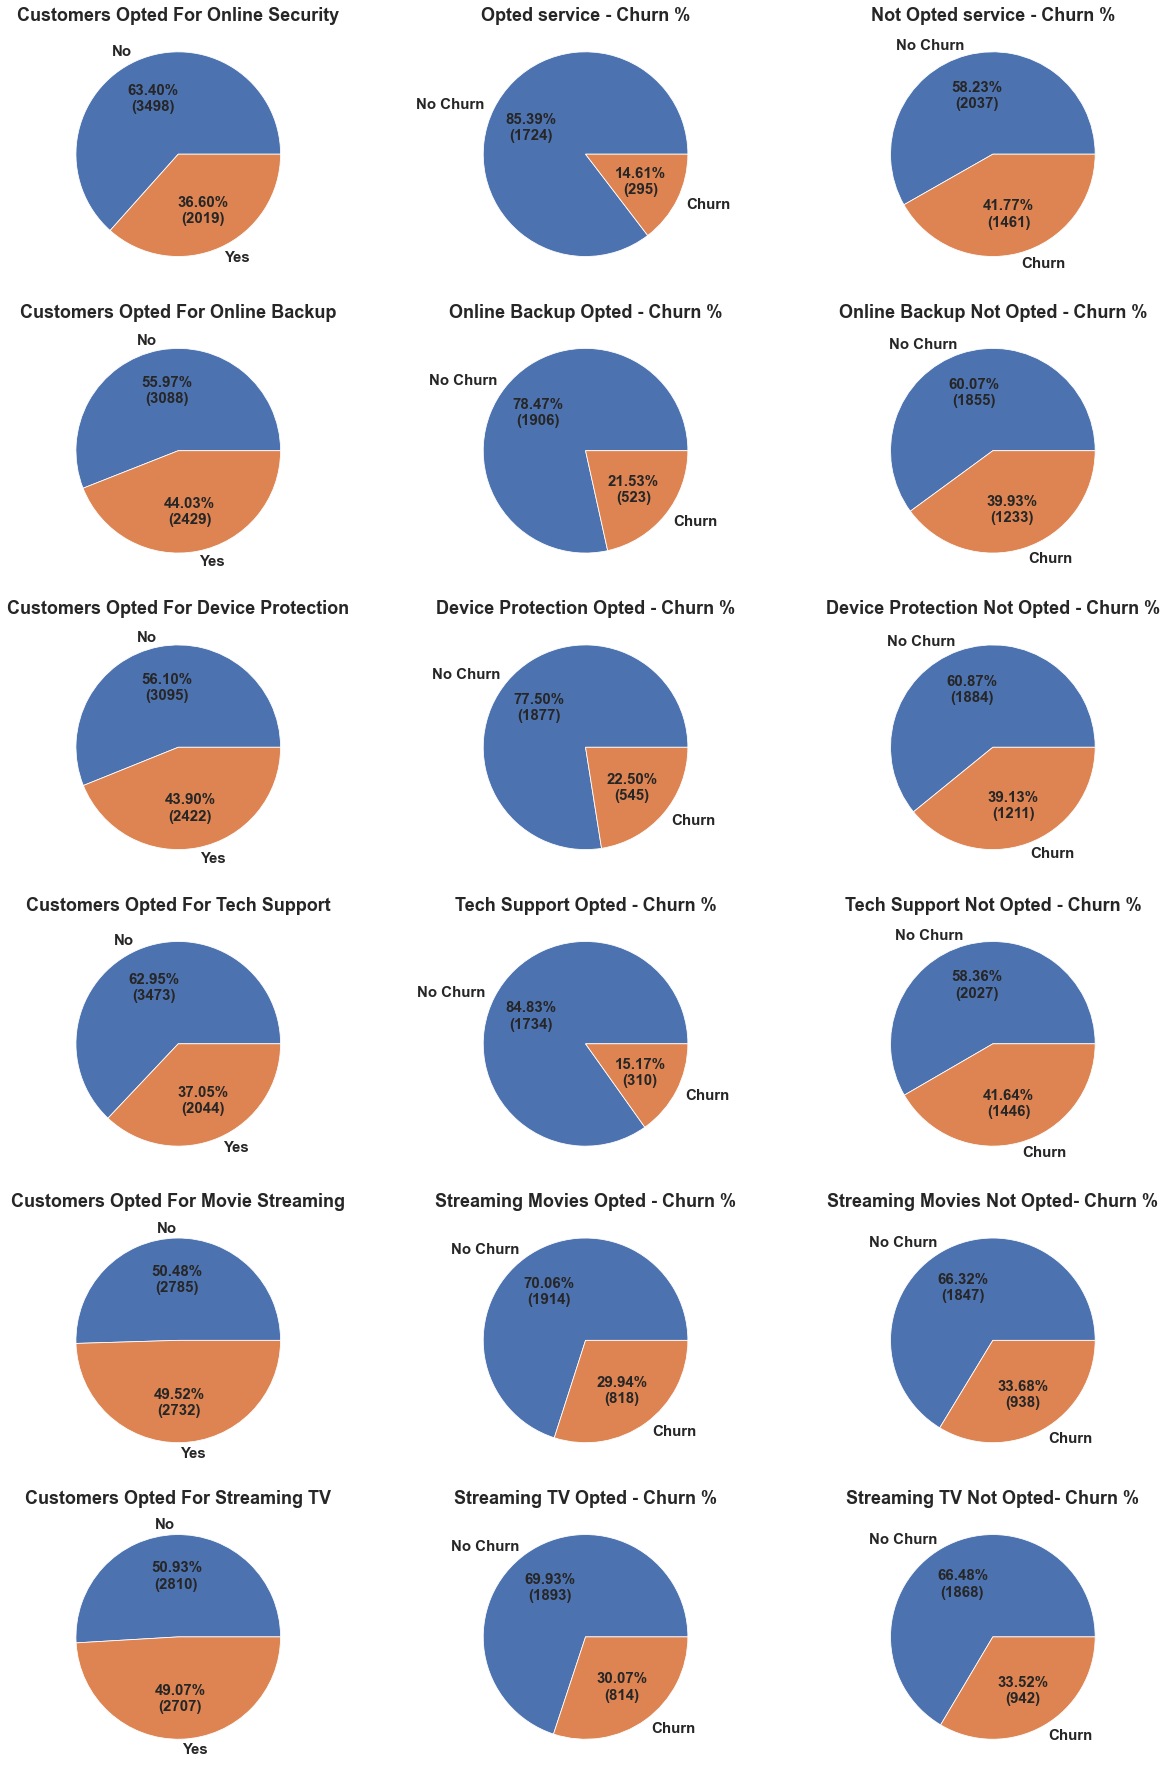

In [81]:
def plot_services(df):
    copy = df[df.internetservice != 'No']
    fig = plt.figure(figsize = (18, 25))
    
    fontsize_15 = 15
    fontsize_18 = 18
    
    plt.subplot(631)
    plt.pie(copy.onlinesecurity.value_counts(), labels = ['No', 'Yes'], autopct = data_format(copy.onlinesecurity.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Customers Opted For Online Security', fontweight = 'bold', fontsize = fontsize_18)
    
    plt.subplot(632)
    copy1 = copy[copy.onlinesecurity == 'Yes']
    plt.pie(copy1.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = data_format(copy1.churn.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Opted service - Churn %', fontsize = fontsize_18, fontweight = 'bold')
    
    plt.subplot(633)
    copy1 = copy[copy.onlinesecurity == 'No']
    plt.pie(copy1.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = data_format(copy1.churn.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Not Opted service - Churn %', fontsize = fontsize_18, fontweight = 'bold')
    
    plt.subplot(634)
    plt.pie(copy.onlinebackup.value_counts(), labels = ['No', 'Yes'], autopct = data_format(copy.onlinebackup.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Customers Opted For Online Backup', fontweight = 'bold', fontsize = fontsize_18)

    plt.subplot(635)
    copy2 = copy[copy.onlinebackup == 'Yes']
    plt.pie(copy2.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = data_format(copy2.churn.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Online Backup Opted - Churn %', fontsize = fontsize_18, fontweight = 'bold')

    plt.subplot(636)
    copy2 = copy[copy.onlinebackup == 'No']
    plt.pie(copy2.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = data_format(copy2.churn.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Online Backup Not Opted - Churn %', fontsize = fontsize_18, fontweight = 'bold')

    plt.subplot(637)
    plt.pie(copy.deviceprotection.value_counts(), labels = ['No', 'Yes'], autopct = data_format(copy.deviceprotection.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Customers Opted For Device Protection', fontweight = 'bold', fontsize = fontsize_18)

    plt.subplot(638)
    copy3 = copy[copy.deviceprotection == 'Yes']
    plt.pie(copy3.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = data_format(copy3.churn.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Device Protection Opted - Churn %', fontsize = fontsize_18, fontweight = 'bold')

    plt.subplot(639)
    copy3 = copy[copy.deviceprotection == 'No']
    plt.pie(copy3.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = data_format(copy3.churn.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Device Protection Not Opted - Churn %', fontsize = fontsize_18, fontweight = 'bold')
  
    plt.subplot(6,3,10)
    plt.pie(copy.techsupport.value_counts(), labels = ['No', 'Yes'], autopct = data_format(copy.techsupport.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Customers Opted For Tech Support', fontweight = 'bold', fontsize = fontsize_18)
    
    plt.subplot(6,3,11)
    copy4 = copy[copy.techsupport == 'Yes']
    plt.pie(copy4.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = data_format(copy4.churn.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Tech Support Opted - Churn %', fontsize = fontsize_18, fontweight = 'bold')
      
    plt.subplot(6,3,12)
    copy4 = copy[copy.techsupport == 'No']
    plt.pie(copy4.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = data_format(copy4.churn.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Tech Support Not Opted - Churn %', fontsize = fontsize_18, fontweight = 'bold')
       
    plt.subplot(6,3,13)
    plt.pie(copy.streamingmovies.value_counts(), labels = ['No', 'Yes'], autopct = data_format(copy.streamingmovies.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Customers Opted For Movie Streaming', fontweight = 'bold', fontsize = fontsize_18)
    
    plt.subplot(6,3,14)
    copy6 = copy[copy.streamingmovies == 'Yes']
    plt.pie(copy6.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = data_format(copy6.churn.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Streaming Movies Opted - Churn %', fontsize = fontsize_18, fontweight = 'bold')

    plt.subplot(6,3,15)
    copy6 = copy[copy.streamingmovies == 'No']
    plt.pie(copy6.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = data_format(copy6.churn.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Streaming Movies Not Opted- Churn %', fontsize = fontsize_18, fontweight = 'bold')

    plt.subplot(6,3,16)
    plt.pie(copy.streamingtv.value_counts(), labels = ['No', 'Yes'], autopct = data_format(copy.streamingtv.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Customers Opted For Streaming TV', fontweight = 'bold', fontsize = fontsize_18)
    
    plt.subplot(6,3,17)
    copy5 = copy[copy.streamingtv == 'Yes']
    plt.pie(copy5.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = data_format(copy5.churn.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Streaming TV Opted - Churn %', fontsize = fontsize_18, fontweight = 'bold')
    
    plt.subplot(6,3,18)
    copy5 = copy[copy.streamingtv == 'No']
    plt.pie(copy5.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = data_format(copy5.churn.count()), textprops = {'fontsize': fontsize_15, 'fontweight':'bold'})
    plt.title('Streaming TV Not Opted- Churn %', fontsize = fontsize_18, fontweight = 'bold')
    
    plt.tight_layout()
    
    
plot_services(df)

##  Conclusion: 
- Customer who is not opted for addition service are more likely to churn

# Monthly Charges

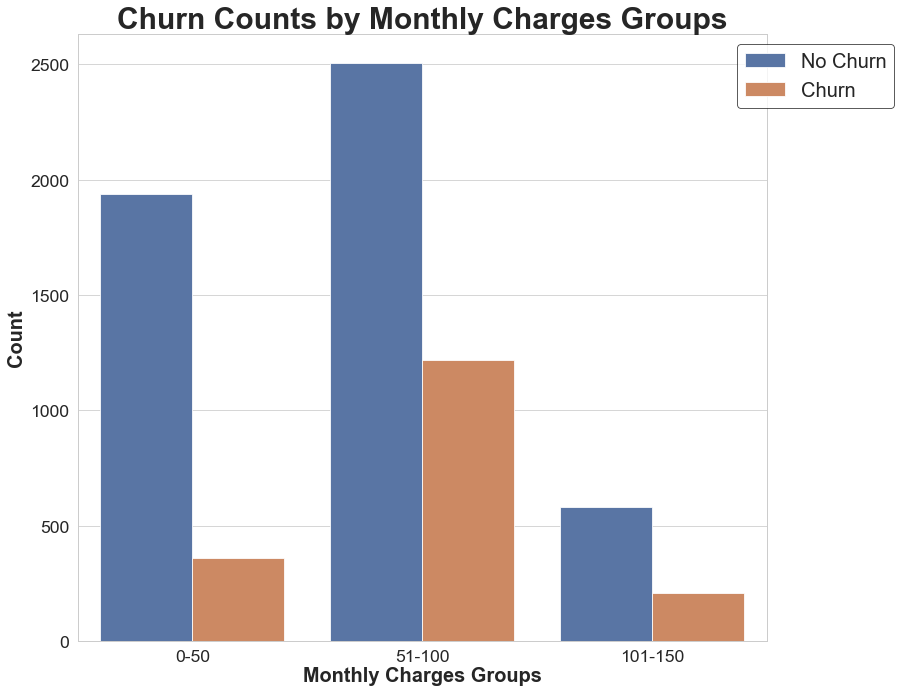

In [82]:
def monthlycharges_groups(df) :
    
    if (df.monthlycharges > 0) & (df.monthlycharges <=50)  :
        return "0-50"
    elif (df.monthlycharges > 51) & (df.monthlycharges <=100):
        return "51-100"
    elif (df.monthlycharges > 101) & (df.monthlycharges <=150) :
        return "101-150"
    
    

def monthlycharges_groups_counts(df):
    plt.figure(figsize = (13,10))
    t = sns.countplot(data = df, x = 'grouped_monthlycharges', hue = 'churn', order = ['0-50', '51-100', '101-150'])
    t.set_title('Churn Counts by Monthly Charges Groups', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Monthly Charges Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()
    
df['grouped_monthlycharges'] = df.apply(lambda df: monthlycharges_groups(df), axis = 1)
monthlycharges_groups_counts(df)

##  Conclusion: 
- Customers whos monthly charges between 51-100 are more likely to churn

C:\Users\i331215\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '% of Customers')

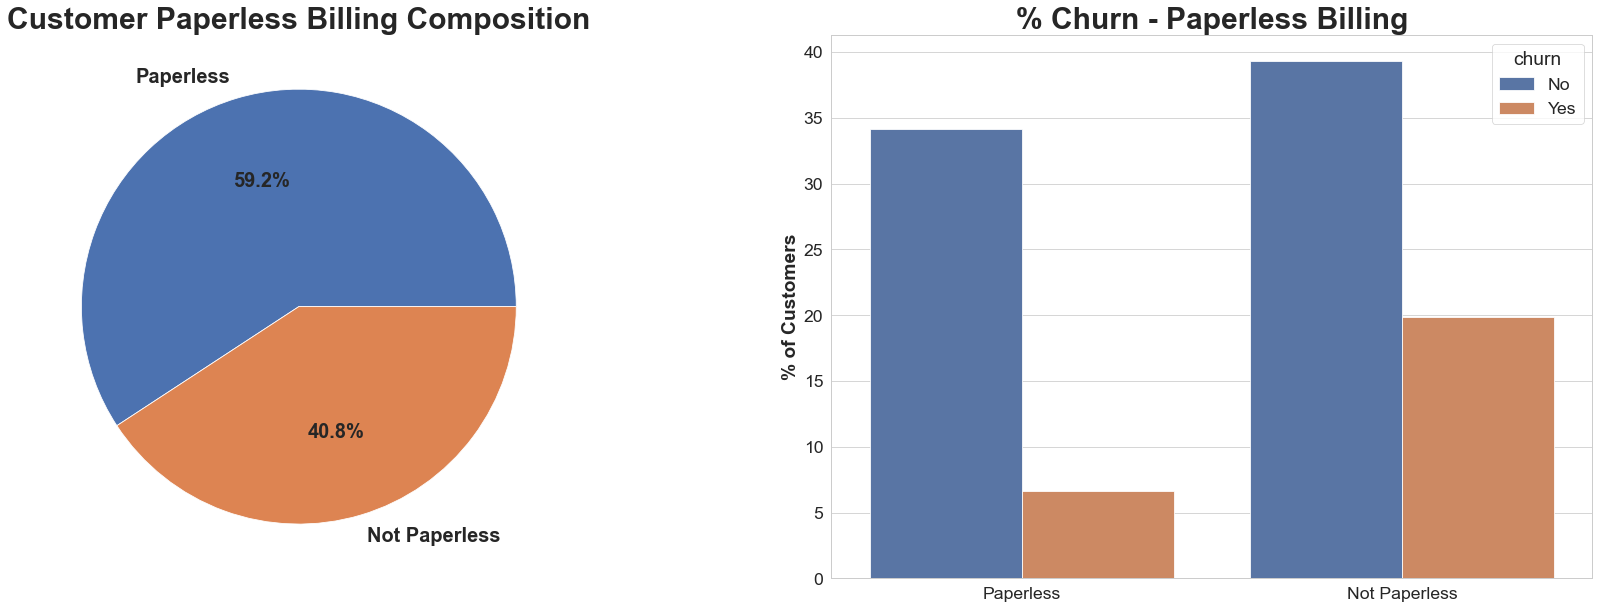

In [83]:
#Paperless
copy = df.copy()
    
plt.figure(figsize = (30, 10))

plt.subplot(121)
plt.pie(copy.paperlessbilling.value_counts(), labels = ['Paperless', 'Not Paperless'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
plt.title('Customer Paperless Billing Composition', fontweight = 'bold', fontsize = 30)

plt.subplot(122)
plt.title('Churn % by Billing Type', fontsize = 30, fontweight = 'bold')
copy = copy.groupby('paperlessbilling')['churn'].value_counts().to_frame()
copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
copy['pct_total'] = (copy['pct_total']/len(df)) * 100
a = sns.barplot('paperlessbilling', y = 'pct_total', hue = 'churn', data = copy)
a.set_title('% Churn - Paperless Billing', fontsize = 30, fontweight = 'bold')
a.set(xticklabels = ['Paperless', 'Not Paperless'])
a.set_xlabel('')
a.set_ylabel('% of Customers', fontweight = 'bold')

##  Conclusion: 
- Customers who not opted for paperless billing are more likely to churn. 

C:\Users\i331215\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Bank transfer (automatic)'),
 Text(1, 0, 'Credit card (automatic)'),
 Text(2, 0, 'Electronic check'),
 Text(3, 0, 'Mailed check')]

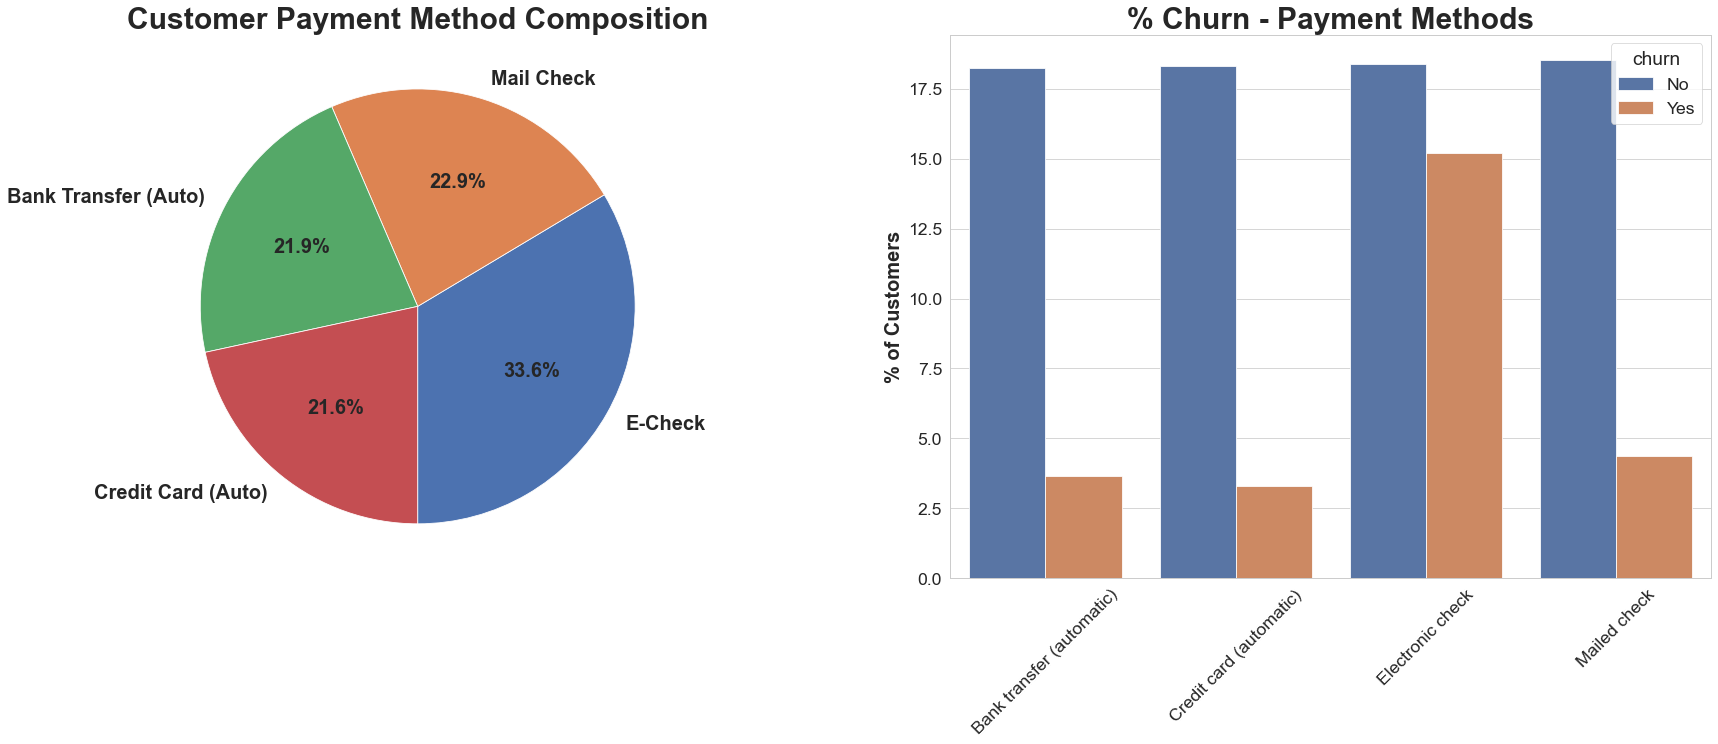

In [84]:
#paymethod
copy = df.copy()
    
plt.figure(figsize = (30, 10))

plt.subplot(121)
plt.pie(copy.paymentmethod.value_counts(), labels = ['E-Check', 'Mail Check' , 'Bank Transfer (Auto)', 'Credit Card (Auto)'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = -90)
plt.title('Customer Payment Method Composition', fontsize = 30, fontweight = 'bold')

plt.subplot(122)
copy = copy.groupby('paymentmethod')['churn'].value_counts().to_frame()
copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
copy['pct_total'] = (copy['pct_total']/len(df))*100
a = sns.barplot('paymentmethod', 'pct_total', 'churn', data = copy)
a.set_title('% Churn - Payment Methods', fontsize = 30, fontweight = 'bold')
a.set_xlabel('')
a.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
a.set_xticklabels(a.get_xticklabels(), rotation = 45)

##  Conclusion: 
- Customers who opted for electronic check payment method are more likely to churn.